In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter
import matplotlib.pyplot as plt

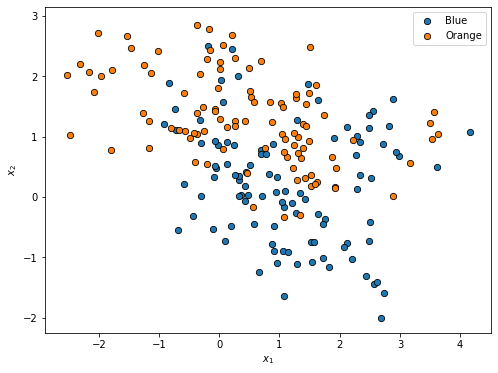

In [32]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train)
plt.show()

## 多元自适应回归样条

In [17]:
from pylib.utils.functions_for_classification import plot_decision_boundary
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from pyearth import Earth

In [18]:
mars = Pipeline(
    [('earth', Earth()),
     ('logistic', LogisticRegression(solver='lbfgs'))])
mars.fit(X_train, y_train)

E:\a-soft\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
E:\a-soft\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Pipeline(memory=None,
         steps=[('earth',
                 Earth(allow_linear=None, allow_missing=False, check_every=None,
                       enable_pruning=True, endspan=None, endspan_alpha=None,
                       fast_K=None, fast_h=None, feature_importance_type=None,
                       max_degree=None, max_terms=None, min_search_points=None,
                       minspan=None, minspan_alpha=None, penalty=None,
                       smooth=None, thresh=None, use_fast=None, verbose=0,
                       zero_tol=None)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, v

In [19]:
train_err = 1 - mars.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.255


In [20]:
test_err = 1 - mars.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.262


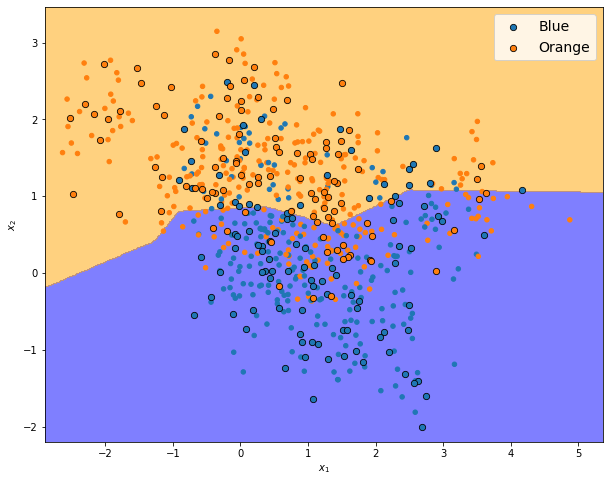

In [21]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, mars)
plt.show()

### 寻找最优参数

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [26]:
mars_pipe = Pipeline(
            [('earth', Earth()),
             ('logistic', LogisticRegression(solver='lbfgs'))])
param_grid = {'earth__max_terms': np.arange(2, 21, 1),
              'earth__max_degree': np.arange(2, 7),
              'earth__penalty':  [0.1, 0.5, 0.7] }
mars_cv = GridSearchCV(mars_pipe,
                       param_grid,
                       cv=10,
                       n_jobs=-1,
                       return_train_score=True)
mars_cv.fit(X_train, y_train)

E:\a-soft\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
E:\a-soft\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('earth',
                                        Earth(allow_linear=None,
                                              allow_missing=False,
                                              check_every=None,
                                              enable_pruning=True, endspan=None,
                                              endspan_alpha=None, fast_K=None,
                                              fast_h=None,
                                              feature_importance_type=None,
                                              max_degree=None, max_terms=None,
                                              min_search_points=None,
                                              minspan=None, minspan_alpha=None,...
                                                           random_state=None,
                                                    

In [27]:
mars_cv.best_params_

{'earth__max_degree': 3, 'earth__max_terms': 18, 'earth__penalty': 0.1}

### 使用最优模型

In [28]:
mars_best = mars_cv.best_estimator_

In [29]:
train_err = 1 - mars_best.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.190


In [30]:
test_err = 1 - mars_best.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.242


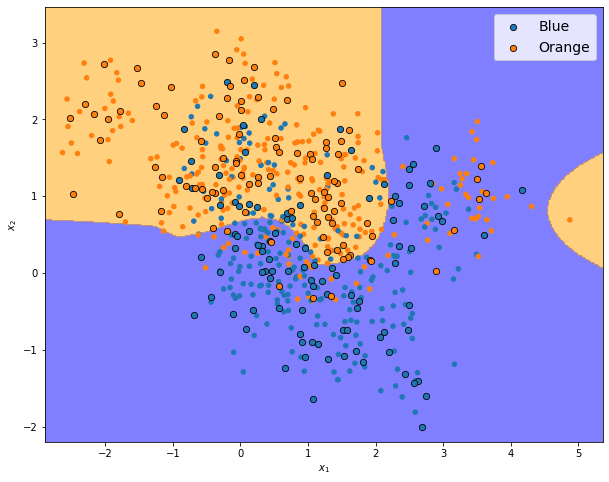

In [31]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, mars_best)
plt.show()